<h2 align=center> Principal Component Analysis</h2>

### Task 1: Introduction
---

In this project, we are going to implement PCA from scratch without using any popular ML libraries like scikit learn.

### Task 2: Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot") # here, Im setting up the style of matplotlib plots to ggplot.
plt.rcParams["figure.figsize"] = (12, 8) # here, I'm setting up the default figsize to 12 by 8.

PCA  is a very popular linear transformation tools that's often use in dimensionality reduction for ML algorithms. In a lot of ML problems, the data is often high dimensional. (e.g. images.). In such cases, you cannot expect the training data to densely populate this high dimensional space. Which means that there will be large part of this dimensional space that are informative or known to us. In this cases we seek to find the lower dimensional representation of this data. And the crucial idea is that, ehile these data vectors, can be extremely highly dimensional, they will still lie closer to a typically much lower dimensional manifold or a hyperplane. Which means that the distribution of the data is relatively concentrated and not densely occupying the space. So in this typical cases, what we can do is concentrate on the computation coeffecient linear dimensionality  technique where we project our dimensional data point to lower dimensional vector.

Two very popular method to achive this are known as PCA and Linear Discriminant Analysis (LDA). Both of these are linear transformation method. Which means that they will transform the data and project it onto a linear subscpace.

What PCA does is that it gives you the direction, which are called the principal component, to return the principal components that maximize the variance of the data. In other words, PCA projects the entire dataset onto a different subspace or feature space.

In [3]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
# This a popula ML datasets that lives on UCI repository.

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header = None) # specifiy that the dataset has no header.
# the dataset contains measurement for about a 150 iris flowers from 3 different species.

iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We have 5 columns in thedataset. The last column pertain to the species.
Below are the meaning of each columns based on the UCI repository:

- 0 = length of the sepal
- 1 = sepal width
- 2 = petal length
- 3 = petal width
- 4 = specie

In [4]:
# assign the columns
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# instead of doing data imputation technique just to keep it simplier, let's just drop
#any row for which the column are na.
iris.dropna(how='all', inplace=True) # this specify only, that if the entries in a row are na or null values, we'll drop them

#check the head again
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Our data has a total of 5 columns and 150 entries(rows). This is a pretty mall dataset ofcouse.

### Task 3: Visualize the Data
---

It's always a good practice to plot the data before choosing and implementing an algorithm of your choice. This applies to most of data science and ML problems.

Let's use seaborn.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

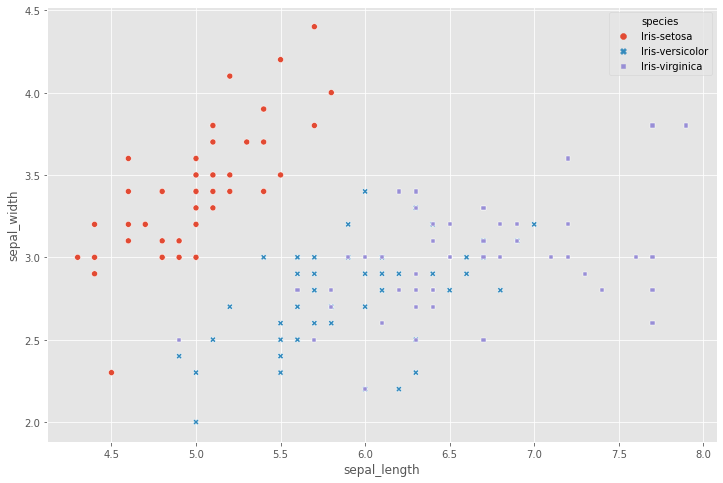

In [6]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width,
                hue = iris.species, # hue pertains to how we color the labels.
                style = iris.species # this pertains to how specify the legends.
               )

The plot shows the distribution of our data according to sepal width and sepal length.
Each of the points a re colored via their species. (refer to the legend).

You may notice that it's quite hard to distinguish or separate the classes iris-versicolors and iris-virginica. There's a lot of overlap here. After applying our PCA transformation and transforming this original dataset into a PCA representation, we're hoping that we'll get a better class separability.

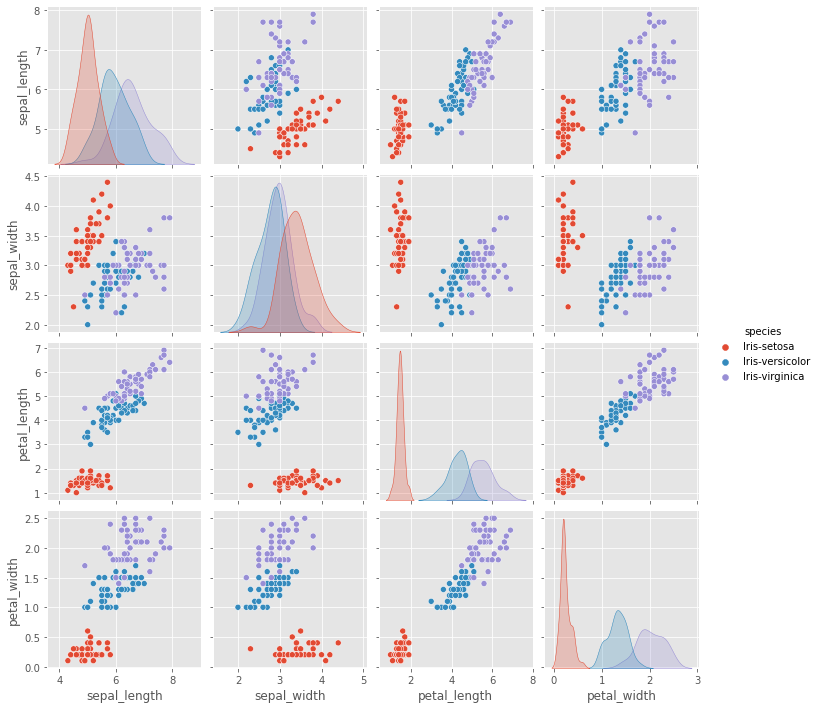

In [24]:
# Let's try using pairplot
sns.pairplot(iris, hue='species')

### Task 4: Standardize the Data
---

"With great power to reduce dimensionality comes great responsibility."

When applying PCA to dataset, take care to preprocess the input data appropriately. One of these crucial step is to zero-out the mean from each features and subtract the mean from each feature from the training set. We can also normalize the values if each one of our features are on different units and scales.

As we saw earlier, our dataset contains 150 rows and 5 columns. Columns 1-4 are our features and the 5th column, species column, is the label. The species column is the target we would ideally want to predict using some sort of classification algorithm. E.g. Logistic Regression.

Let's separate our dataframe into a features matrix. That's going to be 150 rows by four columns, where each rows describes a unique or different flower which is to say that each row contains a new sample. We also have our target vector y, which has the species.

In [14]:
# feature matrix
X = iris.iloc[:, 0:4].values # This is simply subsetting all of the rows for 
                             # the columns 0 to 4 where 4 is not included.
                             # And we take the values from that result.
# Actually the code above can also be attained by specifying the names of the columns but that
# would be longer than the one above.

# target vector
y = iris.species.values

In [15]:
# Let's standardize our data using StandardScaler from scikit learn preprocessing helper function.
from sklearn.preprocessing import StandardScaler

# Let's apply the StandardScaler to X. Use fit transform method to transform it.
X = StandardScaler().fit_transform(X)

This will standardize our feature matrix. What it does is simply replacing each feature value by the feature minus its mean and dividing it by the standard deviation of the feature. What this does is ensure all of our features have zero mean and a unit variance. This is an important step not just in PCA but in many ML algorithms but is especially important in the case of PCA.

In the PCA algorithm, we want it to give equal weight to each of the features while making the projection. So if one or more features in our dataset are in a different scale entirely than the rest, those non-standardized features will dominate __eigenvalues__ and give us inaccurate result. This is a direct consequence of how PCA works. It's gonna project our data into directions that maximize the variance along those axis.

Now our next steps are gonna be to tackle the workhorse of PCA, the __Eigenvectors__ and the __Eigenvalues__ of the covariance matrix.

### Task 5: Compute the Eigenvectors and Eigenvalues
---

There are two general ways to perform PCA. The more computationally effective way is to do something called __Singular Value Decomposition__ or __SVD__. We'll do that in _Task 6_. But for this task, we will use Eigen Decomposition Method.

As a reminder, PCA aims to find linearly un-correlated othagonal axis which are also known as principal components in this end-dimensional space to project the data points onto these principle components where the first principle component captures the largest variance in the data along that axis. The principal component can be determined via this method called eigen decomposition.

What it's gonna do is first create a covariance matrix given the formula below.

Note: The notation in the covariance matrix sigma is somehow similar to summation sign.

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [16]:
# calculate the covariance matrix using numpy
covariance_marix = np.cov(X.T) # transpose simply means converting all the rows to columns and vice versa.

# lets look at the values
print("Covariance matrix: \n", covariance_marix)

Covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


These are our covariance matrix. In linear algebra, this is a symmetric positive semidefinite matrix. Each of these columns are orthonormal to each other.

Note: A symmetric matrix is positive semidefinite if and only if its eigenvalues are nonnegative.

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

__Explanation:__ The sigma here can be broken down, where the W is the eigenvectors and capital lambda here is gonna be a diaganol matrix where the non-zero entries are the eigenvalues. So each of these W (eigenvectors) are the principal components. They are the basis vectors that gives us the orthagonal direction in this used space. The eigenvalues tell us how much to stretch along that space. The magnitude of eignevalue tells us how far we need to go into that direction. 

In [17]:
# Let's compute the eigendecomposition.
# The math behind this is somehow intimidating. But we have numpy to the rescue.
# Let's use the Linear algebra package from numpy to return this decomposition for us.

eigen_values, eigen_vectors = np.linalg.eig(covariance_marix)
# this will return the corresponding eigen values and vectors.

# let's print this out
print('Eigenvectors: \n', eigen_vectors, "\n")
print('Eigenvalues: \n', eigen_values)

Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


The eigenvectors corresponds to the column of the larger matrix. So our first principal component (first eigenvectors) is 0.522. The second value is 0.26 and so on..

And each of these eigenvectors can be scaled by the eigenvalues. The value 2.93 is the eigenvalue for the first column of the eigenvectors.

### Task 6: Singular Value Decomposition (SVD)
---

Like we did with eigendecompoaition, implementing an SVD is extremely simple. Given that we have the numpy as a handy tool.

In [18]:
# let's calculate eigenvectors
eigen_vec_svd, s, v = np.linalg.svd(X.T)

# print our eigenvectors.
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

The array we generated here is the same with the eigenvectors we generated above. The difference is the sign. For exmaple, the first value 0.522 is negative here while in the above it was positive.

For this project, the sign doesn't really matter to us. Because all we need is to find the direction. Either it is in the positve direction or negative direction, it will still tell us what axis we are on. So the principal componet remains the same.

One of the most widely used application of PCA is dimensionality reduction. So we have a really high dimensional dataset and putting it through something like logistic regression or support vector classifier is computationally inefficient because if we have a thousand dimensional feature space, the runtime complexity is gonna be extremely high and even our ram usage might used up. So in that case we might want to use PCA to just select a subset of features which explains most of the variance in our data.

### Task 7: Picking Principal Components Using the Explained Variance
---

The number of principal component is less than the number of features in our orginal dataset. But we previously saw that the eigendecomposition returned for eigenvector and their corresponding eigenvalues. So how we choose this principle components depends on the way we sort the eignvalues. So first, let's sort the eigenvalues in dsecnding order and pick the top K using a concept called Explained Variance.

In [19]:
# For refresher, print our eignevalues
for val in eigen_values:
    print(val)

# after this, now they are descending order.

2.930353775589313
0.9274036215173417
0.1483422264816399
0.020746013995595784


In [20]:
# Let's calculate the vairance of each of these components
# Let's exclude the one with th low variance explanation
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values] # multiply to 100 to get the percentage.

#print out
variance_explained

[72.77045209380131, 23.030523267680664, 3.6838319576273926, 0.515192680890629]

What's this telling us is that 72.77% of the variance in our data is explained by the first principle component with an eignenvalue of 2.93.

The second component explained a 23.03% variance.
The third and fourth components have a belwo relevance to how much variance they explained in the data.

So what we can do is simply select the first two features. To make it more clear, let's look at the cumulative varaince explained.

In [21]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

Hwere we see that the first features are jjust using that alone explained 72.77% in our data. And if we use the first two features, we are able to capture 95.80% of the data. if we use three, we capture 99.48%. And if we use all the features, that means we are describing the entire dataset. But for this project and in general best practice, it is convention to use 95 explained variance.

To make thing even more clear, let's visualize this.

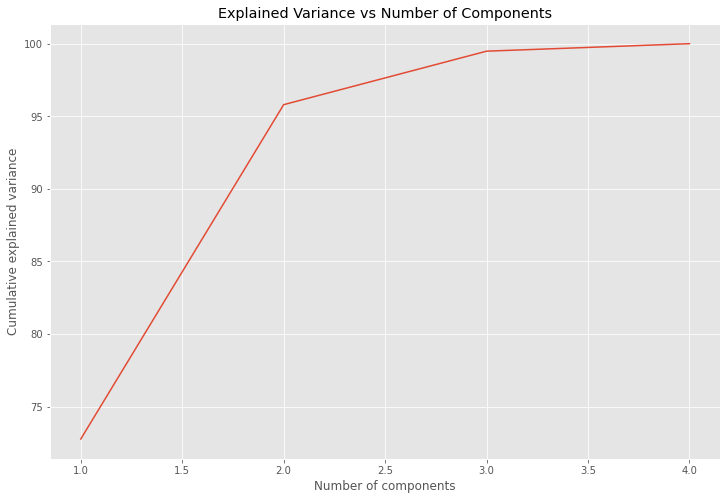

In [22]:
# lets use lineplot from seaborn
sns.lineplot(x = [1, 2, 3, 4], # x is when we use the first component; 
                               # 2 is when we use the first two components; 
                               # 3 is first three; 4 is first four.
             y = cumulative_variance_explained) # our y variable is cumulative_variance_explained.
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs Number of Components')
plt.show()
# this explained variance or cumulative explained variance is also called 
# The Explained Variance Ratio sometime.
# We can see this in scikit learn and other ML libraries for their implementation of PCA. They have
# a method called explained variance ratio.

The plot above depicts exactly what we observed so far. Our first component in the x-axis explains around 72-73% of the variance. And if we use the first two components, we get about little over 95% of explained variance. So here we are going to cut-off in a two component use just these two components to transform our data.

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

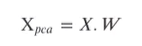

In [25]:
# lets take a look at our eigenvectors
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

Since we decided the first two principal components. These are the first two vertical columns in our array above.

In [26]:
# the variable below is just a fancy name for this.
# get the eigenvectors
# transpose it. Because we want to just select each on these columns
# [:] [:] these specifies all the rows and columns
# [:2] this subset all the rows and first 2 columns 

projection_matrix  =(eigen_vectors.T[:][:])[:2].T
print("Projection matrix: \n", projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


And voila! We successfully got the first two entries. These two entries corresponds to the tw orpincipal components onto whixch we are going to project our data.

In [27]:
# this is based on the formula above
X_pca = X.dot(projection_matrix) # the W is our projection_matrix

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

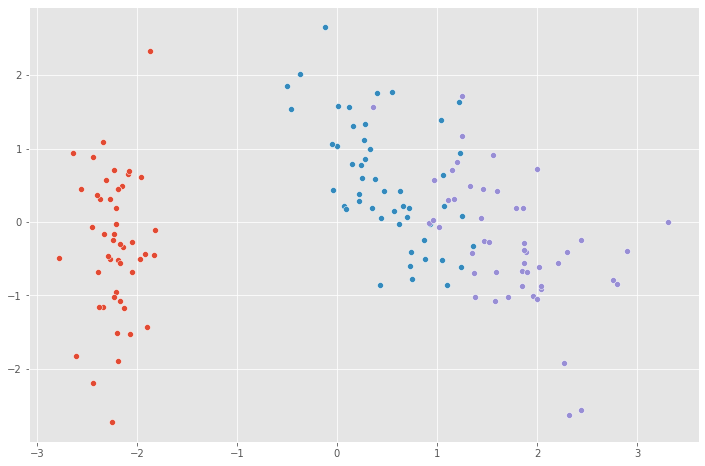

In [28]:

# plot our transformed data

for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'): # we're going to reiterate for these species and create a scatter plot for each of them
    sns.scatterplot(X_pca[y==species, 0],
                    X_pca[y==species, 1])

Here we can see different plots compare to the first. So there's a better class separability here. We have just used two components rather than 4 features to plot our data.

The real power of PCA comes when we have extremely high dimensional data and we're looking for computational efficient methods to work with the data.